# Optimization

In [1]:
from wpaf_opt import *
from gis.gis_handler import GISHandler

all_vars = ['x_wec','x_type_wec','x_pen','p_pen','x_env','p_env','p_wec','p_fish_salmon','pos_env', 'gis_handler', 'p_vessel', 'x_disc_pen', 'p_es', 'p_diesel']

# with wave real data
all_vars = all_vars  #+ ['p_wave_vec']
# with wave average data
#all_vars = all_vars  + ['x_wave_ave']

conditions = {'current [m/s]': 'gis/data/Surface Current (m-s).tif',
              'oxygen [mg/l]': 'gis/data/Surface Oxygen (mg-l).tif',
              'salinity [PSU]': 'gis/data/Surface Salinity (PSU).tif',
              'temperature [°C]': 'gis/data/Surface Temperature (C).tif',
              'period [s]': 'gis/data/Wave Energy Period (s).tif',
              'height [m]': 'gis/data/Wave Significant Height (m).tif',
              'bathymetry [m]': 'gis/data/Bathymetry (m).tif',
              #'distance to shore [m]': 'gis/data/Distance to Shore (m).tif',
              'distance to port [m]': 'gis/data/Distance to Port (m).tif'}

# high fishing is above average, very high is more than one standard deviation above average
conflicts = {'very high fishing traffic': 'gis/data/Very High Fishing Vessel Traffic.geojson',
#            'high fishing traffic': 'data/High Fishing Vessel Traffic.geojson',
             'marine protected areas': 'gis/data/Marine Protected Areas.geojson',
             'danger zones': 'gis/data/Danger Zones and Restricted Areas.geojson',
             'submarine': 'gis/data/Submarine Transit Lanes.geojson',
             'torpex': 'gis/data/Cape Cod TORPEX.geojson',
             'block island': 'gis/data/Block Island Renewable Energy Zone.geojson',
             'ma wind': 'gis/data/MA Wind Energy Areas.geojson',
             'wind lease': 'gis/data/Potential Wind Lease Areas.geojson',
             'wind planning': 'gis/data/Wind Planning Areas.geojson',
             'shipping': 'gis/data/Shipping Lanes.geojson'}

waters = "gis/data/Northeast State and Federal Waters.geojson"

handler = GISHandler(conditions, conflicts, waters)

args = {}
args['handler'] = handler
#args['fixed_num_pen'] = 12

x_init, p_init, x, res_best, p_best, op_obj = wpaf_opt(all_vars, args)

aqua_init_obj = Aqua_Obj(x_init.nom0, x_init.name, p_init.nom_dict)
aqua_opt_obj = Aqua_Obj(res_best.x, x.name, p_best) 

init_result(aqua_init_obj)
optimize_result(aqua_opt_obj, x.list, x.unit, res_best)

optimization is running ...
optimization is running ...
optimization is running ...
optimization is running ...
optimization is running ...
optimization is running ...
optimization is running ...
optimization is running ...
optimization is running ...
optimization is running ...
optimization is running ...
++++++++++++++++++++++++++++++++++++++++
Initial objective function terms:
   Objective_func    258.528
   NPV            465993543.033 [$]
   fish_yield     1802488.785 [kg]
----------------------------------------
Initial wave energy converter:
   wec number          7.000 [-]
   wec_P_ave           2.877 [kW]
   wec AEP        176541.833 [kWh]
----------------------------------------
Initial price break down:
   wec NPV              45156342.679 [$]
   Aqua NPV             60476068.078 [$]
   Net Pen CapEx        10602875.206 [$]
   fish feed price      4707676.591 [$]
   vessel travel NPV    788842.102 [$]
   energy storage NPV   359572290.173 [$]
   diesel NPV           3643941.

# Plot power

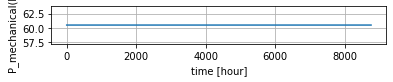

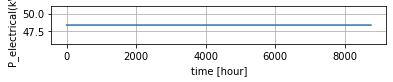

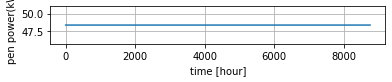

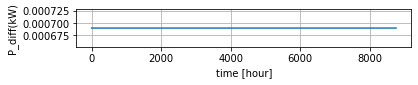

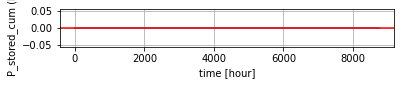

In [2]:
aqua_opt_obj.plot_power()

# Plot fish growth and fish oxygen demand

In [3]:
aqua_opt_obj.plot_variable()

# Plot objective function and constraints

In [4]:
fig, ax = plt.subplots(1,1)
ax.plot(op_obj.f, label='obj_out', marker='*')
ax.set(xlabel='Iterations', ylabel='Cost_per_yield [$/kg]')
ax.legend()
ax.grid(True)
plt.show()

NameError: name 'plt' is not defined

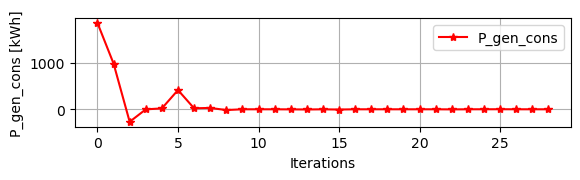

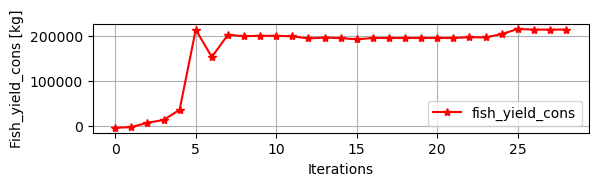

In [ ]:
ax1 = plt.subplot(3,1,1)
ax1.plot(op_obj.ineq[:, 0], 'r', label='P_gen_cons', marker='*')
ax1.set(xlabel='Iterations', ylabel='P_gen_cons [kWh]');
ax1.legend()
ax1.grid(True)
plt.show()

ax2 = plt.subplot(3,1,2)
ax2.plot(op_obj.ineq[:, 1], 'r', label='fish_yield_cons', marker='*')
ax2.set(xlabel='Iterations', ylabel='Fish_yield_cons [kg]');
ax2.legend()
ax2.grid(True)
plt.show()
